In [ ]:
# %%capture
# !pip install physics-tenpy

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib
np.set_printoptions(precision=5, suppress=True, linewidth=100)
plt.rcParams['figure.dpi'] = 150

import tenpy
import tenpy.linalg.np_conserved as npc
from tenpy.algorithms import tebd
from tenpy.networks.mps import MPS
from tenpy.models.tf_ising import TFIChain

In [ ]:
L = 20
model_params = {'J': 1. , 'g': 1.,'L': L,'bc_MPS': 'finite','sort_charge':False}
M = TFIChain(model_params)

In [ ]:
psi = MPS.from_lat_product_state(M.lat, [['up']])

In [ ]:
tebd_params = {
    'N_steps': 1,
    'dt': 0.1,
    'order': 2,
    'trunc_params': {'chi_max': 100, 'svd_min': 1.e-12}
}
eng = tebd.TEBDEngine(psi, M, tebd_params)

In [ ]:
def measurement(eng, data):
    keys = ['t', 'entropy', 'Sx', 'Sz', 'corr_XX', 'corr_ZZ', 'trunc_err']
    if data is None:
        data = dict([(k, []) for k in keys])
    data['t'].append(eng.evolved_time)
    data['entropy'].append(eng.psi.entanglement_entropy())
    data['Sx'].append(eng.psi.expectation_value('Sigmax'))
    data['Sz'].append(eng.psi.expectation_value('Sigmaz'))
    data['corr_XX'].append(eng.psi.correlation_function('Sigmax', 'Sigmax'))
    data['trunc_err'].append(eng.trunc_err.eps)
    return data

In [ ]:
data = measurement(eng, None)

In [ ]:
while eng.evolved_time < 2.:
    eng.run()
    measurement(eng, data)

Text(0, 0.5, 'entanglement entropy $S$')

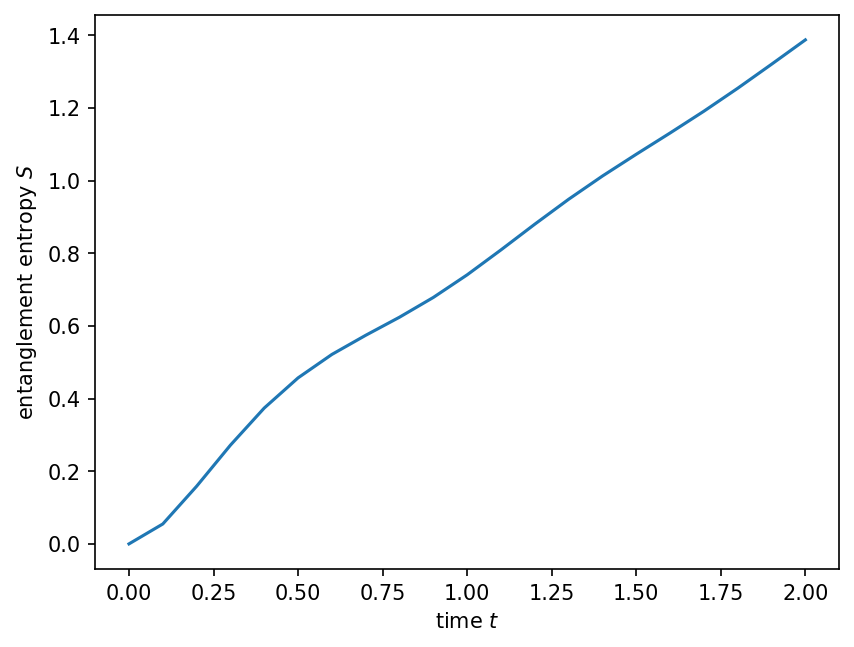

In [ ]:
plt.plot(data['t'], np.array(data['entropy'])[:, L//2])
plt.xlabel('time $t$')
plt.ylabel('entanglement entropy $S$')